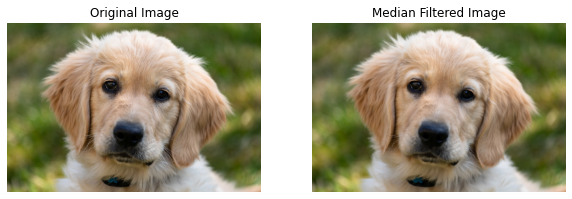

In [5]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('dogy.jpg')

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
    exit()

# Apply median filtering
filtered_image = cv2.medianBlur(image, 5)  # Adjust the kernel size (5 in this case) as needed

# Convert BGR image to RGB for plotting
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
filtered_image_rgb = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB)

# Plot original and filtered images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Median Filtered Image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image_rgb)
plt.title('Median Filtered Image')
plt.axis('off')

plt.show()



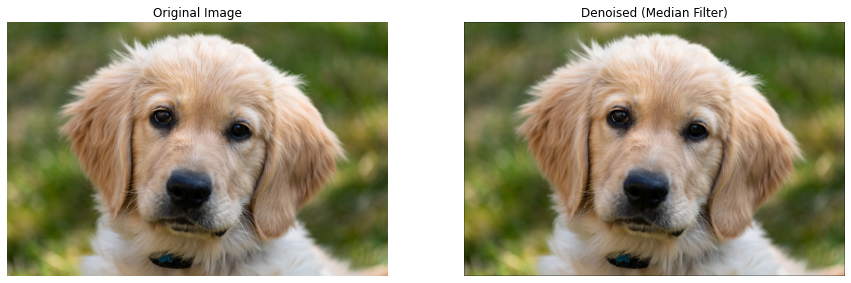

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
def median_filter(image, kernel_size):
    height, width, channels = image.shape
    output = np.zeros((height, width, channels), dtype=np.uint8)
    k_half = kernel_size // 2
    for i in range(k_half, height - k_half):
        for j in range(k_half, width - k_half):
            for c in range(channels):
                neighbors = []
                for m in range(-k_half, k_half + 1):
                    for n in range(-k_half, k_half + 1):
                        neighbors.append(image[i+m, j+n, c])
                output[i, j, c] = np.median(neighbors)
    return output
# Load the image
image_path = 'dogy.jpg'
image = np.array(Image.open(image_path))

# Remove noise using median filter
denoised_median = median_filter(image, kernel_size=3)

# Display the original and denoised images
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(denoised_median)
plt.title('Denoised (Median Filter)')
plt.axis('off')

plt.show()


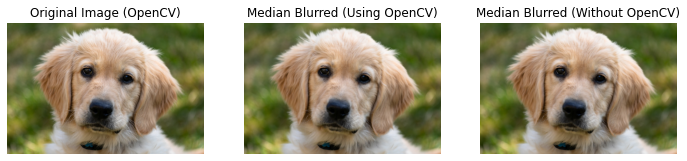

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('dogy.jpg')

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
    exit()

# Convert the image to RGB (matplotlib uses RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply median filtering using OpenCV
filtered_image_opencv = cv2.medianBlur(image, 5)  # Adjust the kernel size as needed

# Define median blur function without using OpenCV
def median_blur_custom(image, kernel_size=3):
    height, width, channels = image.shape
    filtered_image = np.zeros_like(image)
    
    # Apply median blur
    for i in range(height):
        for j in range(width):
            for c in range(channels):
                # Extract the kernel
                kernel = []
                for m in range(max(0, i - kernel_size // 2), min(height, i + kernel_size // 2 + 1)):
                    for n in range(max(0, j - kernel_size // 2), min(width, j + kernel_size // 2 + 1)):
                        kernel.append(image[m, n, c])
                
                # Calculate the median
                median_value = np.median(kernel)
                filtered_image[i, j, c] = median_value
    
    return filtered_image

# Apply median filtering without using OpenCV
filtered_image_custom = median_blur_custom(image, kernel_size=5)  # Adjust the kernel size as needed

# Plot original and filtered images using OpenCV
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image (OpenCV)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(filtered_image_opencv, cv2.COLOR_BGR2RGB))
plt.title('Median Blurred (Using OpenCV)')
plt.axis('off')

# Plot original and filtered images without using OpenCV
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(filtered_image_custom, cv2.COLOR_BGR2RGB))
plt.title('Median Blurred (Without Open)')
plt.axis('off')

plt.show()